## EDA on Haberman's Data set

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore")
haberman = pd.read_csv("haberman.csv")


In [4]:
print (haberman.shape);

(306, 4)


In [5]:
#What are the column names in our dataset
print (haberman.columns);

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [99]:
haberman.describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [6]:
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [7]:
#How many data points for each class are present? 
haberman["status"].value_counts()

status
1    225
2     81
Name: count, dtype: int64

In [15]:
haberman['status'] = haberman['status'].map({1:'survived',2:'died'})

Not a balances dataset survived:225 and died:81 have unequal counts 

# 2-D Scatter Plot

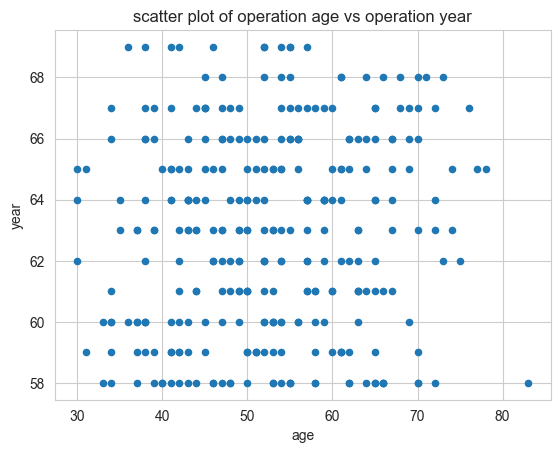

In [102]:
haberman.plot(kind="scatter", x='age', y='year');
plt.title('scatter plot of operation age vs operation year')
plt.show()
# No specific observation 

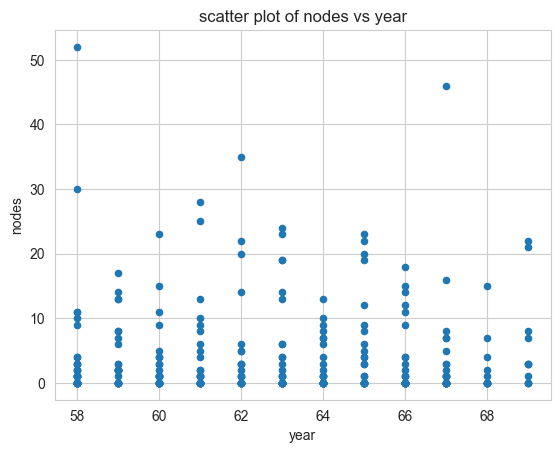

In [47]:
haberman.plot(kind='scatter', x='year', y='nodes') ;
plt.title('scatter plot of nodes vs year')
plt.show()

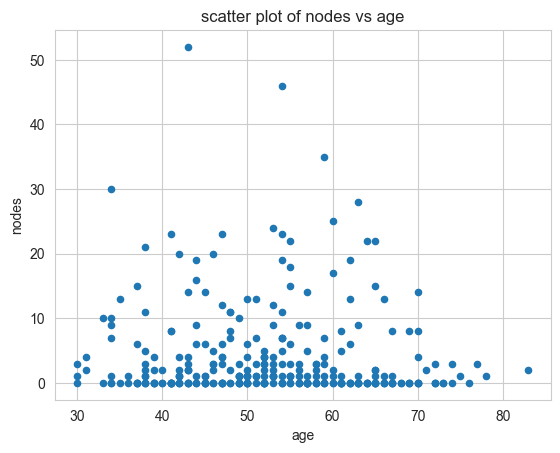

In [48]:
haberman.plot(kind='scatter', x='age', y='nodes', ) ;
plt.title('scatter plot of nodes vs age')
plt.show()


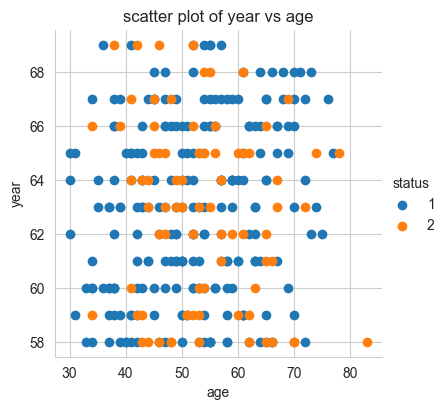

In [8]:
# Adding color for observation
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=4) \
   .map(plt.scatter, "age", "year") \
   .add_legend();
plt.title('scatter plot of year vs age')
plt.show();


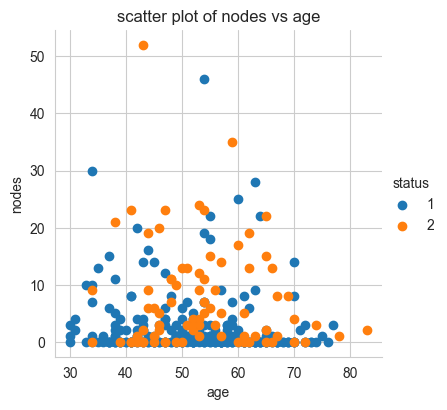

In [9]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.title('scatter plot of nodes vs age')
plt.show();

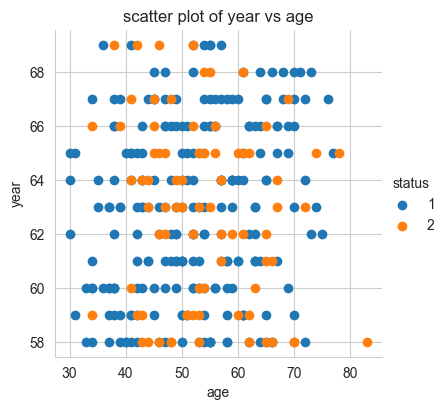

In [10]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=4) \
   .map(plt.scatter, "age", "year") \
   .add_legend();
plt.title('scatter plot of year vs age')
plt.show();

In [11]:
# No clear observation

# Pair-plot

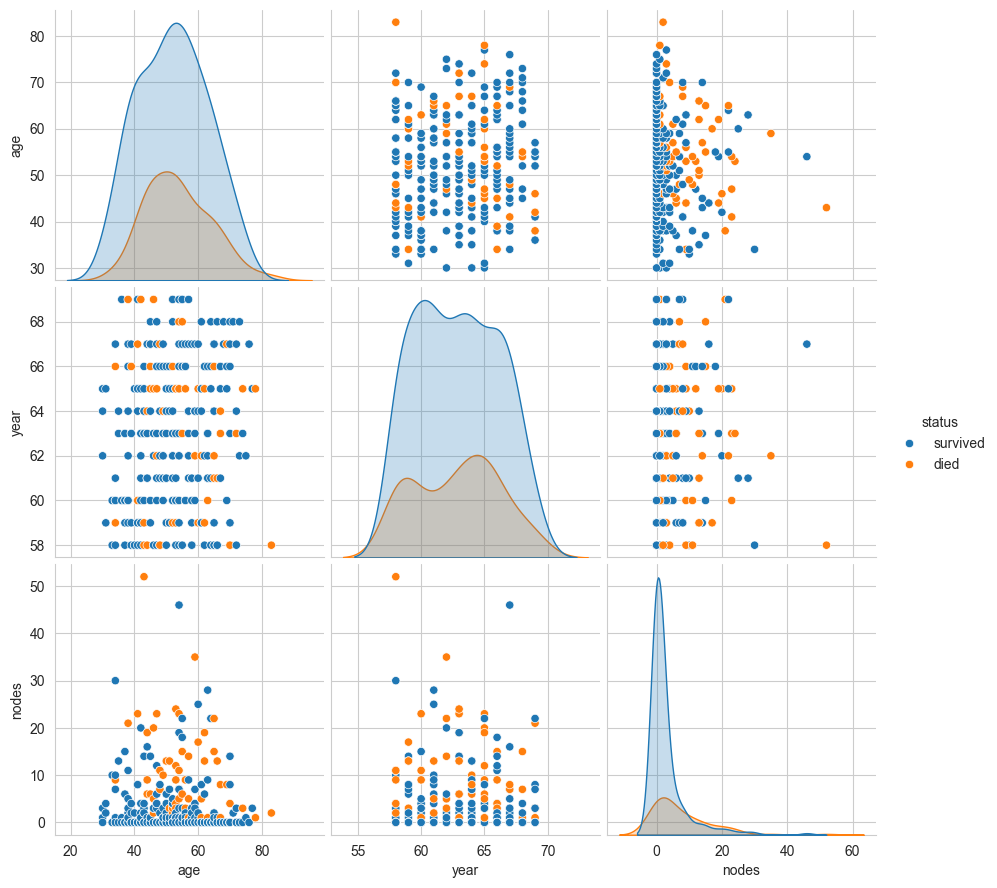

In [18]:
plt.close()
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", height=3);
plt.show()

# Histogram, PDF, CDF

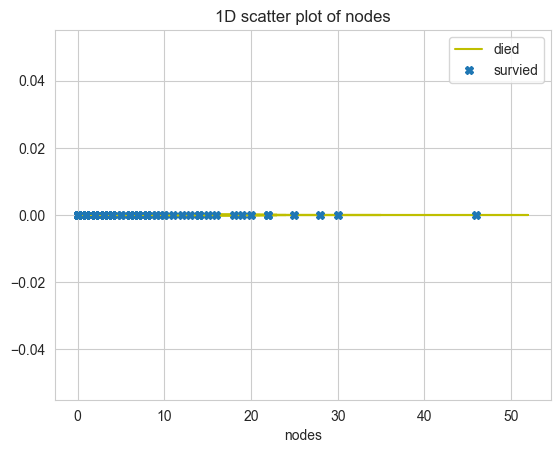

In [29]:
import numpy as np
haberman_survived = haberman.loc[haberman["status"] == 'survived'];
haberman_died = haberman.loc[haberman["status"] == 'died'];

plt.plot(haberman_died["nodes"], np.zeros_like(haberman_died['nodes']), 'y', label='died')

plt.plot(haberman_survaived["nodes"], np.zeros_like(haberman_survived['nodes']), 'X', label='survied')

plt.xlabel('nodes')
plt.title('1D scatter plot of nodes')
plt.legend()

plt.show()

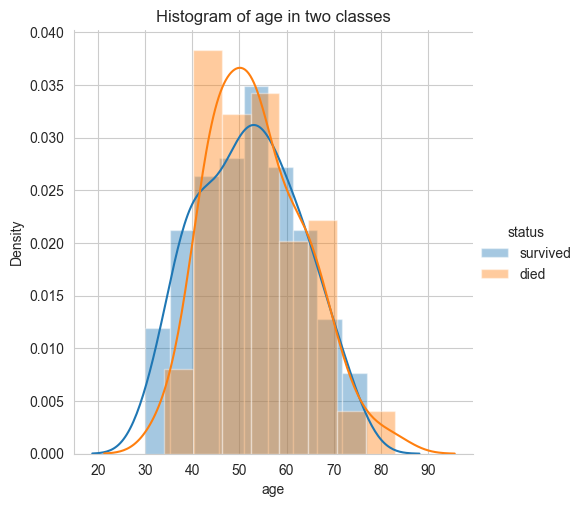

In [30]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title('Histogram of age in two classes')
plt.show();

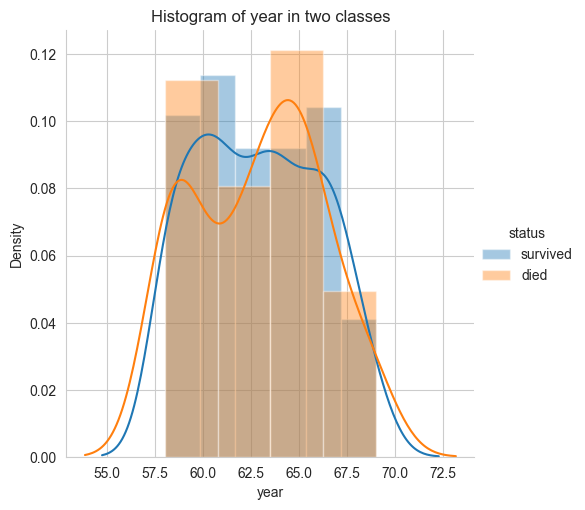

In [31]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title('Histogram of year in two classes')
plt.show();

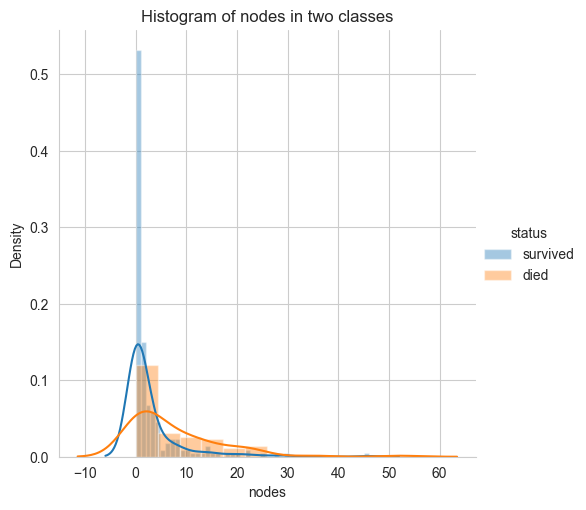

In [32]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title('Histogram of nodes in two classes')
plt.show();

Node >= 30 than died \
Node < 30 than survived with 0.5% probability

# CDF

In [37]:

counts, bin_edges = np.histogram(haberman_survaived['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print('PDF');
print(pdf);
print('CDF')
print(bin_edges);

PDF
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
CDF
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


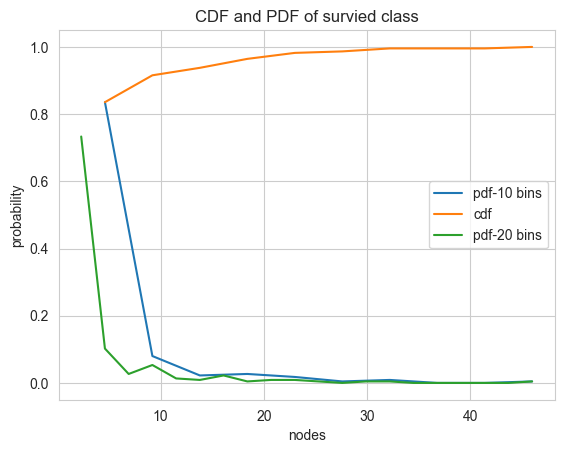

In [38]:
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='pdf-10 bins');
plt.plot(bin_edges[1:], cdf, label='cdf')

counts, bin_edges = np.histogram(haberman_survaived['nodes'], bins=20, density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf, label='pdf-20 bins');
plt.title('CDF and PDF of survied class')
plt.xlabel('nodes')
plt.ylabel('probability')
plt.legend()
plt.show();